# Approval Loan

## Data understanding

1. 'person_age' : usia dari customer
2. 'person_gender' : jenis kelamin dari customer
3. 'person_education' : pendidikan customer
4. 'person_income' : penghasilan customer
5. 'person_emp_exp' : pengalaman bekerja
6. 'person_home_ownership' : kepemilikan rumah
7. 'loan_amnt' : pinjaman yg diajukan
8. 'loan_intent' : tujuan pinjaman
9. 'loan_int_rate' : bunga pinjaman
10. 'loan_percent_income' : persentase pinjaman dibandingan dengan pemasukan tahunan
11. 'cb_person_cred_hist_length' : Panjang riwayat kredit dalam beberapa tahun
12. 'credit_score' : score dari pinjaman sebelumnya
13. 'previous_loan_defaults_on_file' : 	Indicator of previous loan defaults
14. 'loan_status' : approval pinjaman (target)




          
         
         


In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

In [2]:
#load data
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [4]:
#check apakah ada null data 
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

# EDA (Exploratory Data Analysis)

### Persebaran data

Text(0.5, 1.0, 'Distribusi usia peminjam')

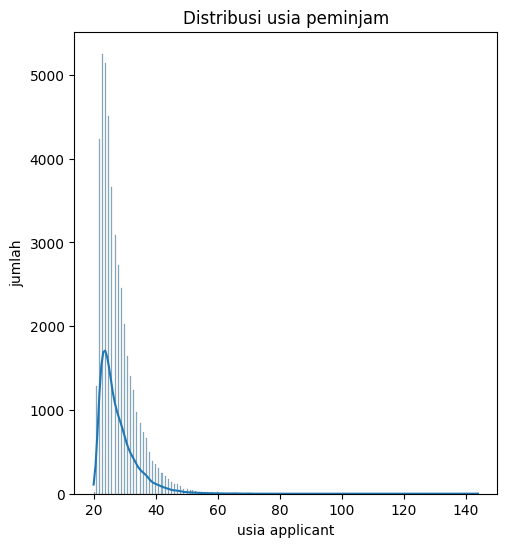

In [5]:
#person age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['person_age'], kde=True)
plt.xlabel('usia applicant')
plt.ylabel('jumlah')
plt.title("Distribusi usia peminjam")

- usia applicant / pelamar cenderung muda di kisaran 20 - 40 tahun

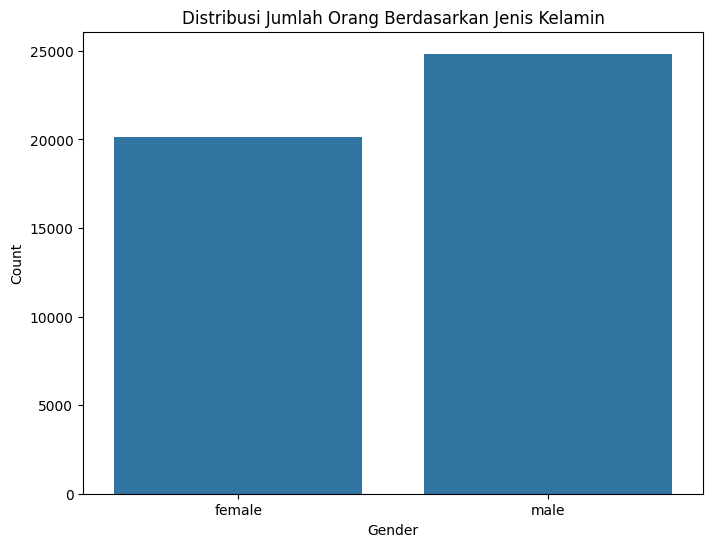

In [6]:
#person gender
# Creating a bar plot to show the count of each gender in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='person_gender', data=df)
plt.title("Distribusi Jumlah Orang Berdasarkan Jenis Kelamin")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_2248/2378033371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_intent', data=df, palette="viridis")


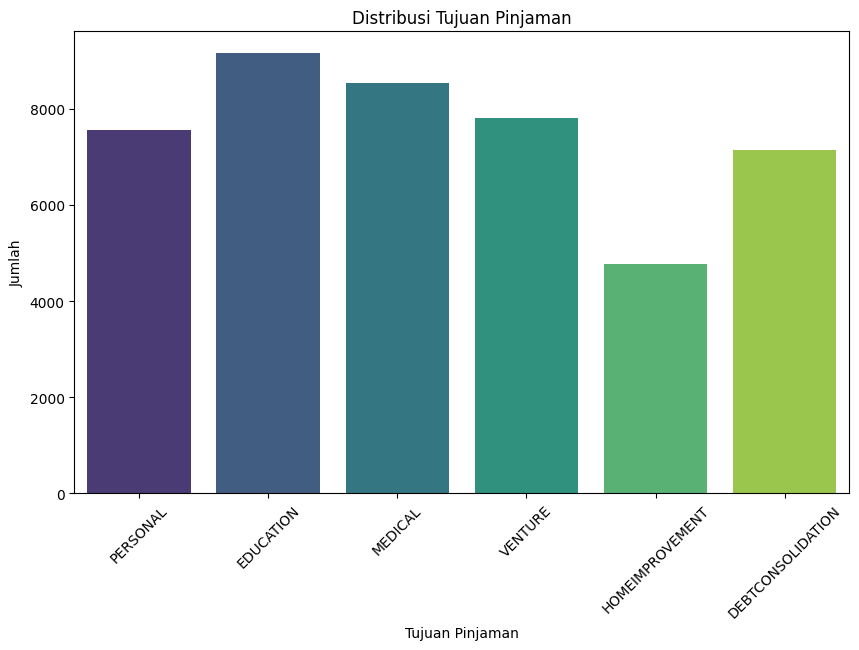

In [7]:
# Re-attempting the plot for loan intent distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_intent', data=df, palette="viridis")
plt.title("Distribusi Tujuan Pinjaman")
plt.xlabel("Tujuan Pinjaman")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

tujuan pinjaman paling tinggi adalah Education & Medical, sedangkan Home Improvement adalah tujuan yang paling rendah

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_2248/2369080449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='credit_score', data=df, palette="Set2")


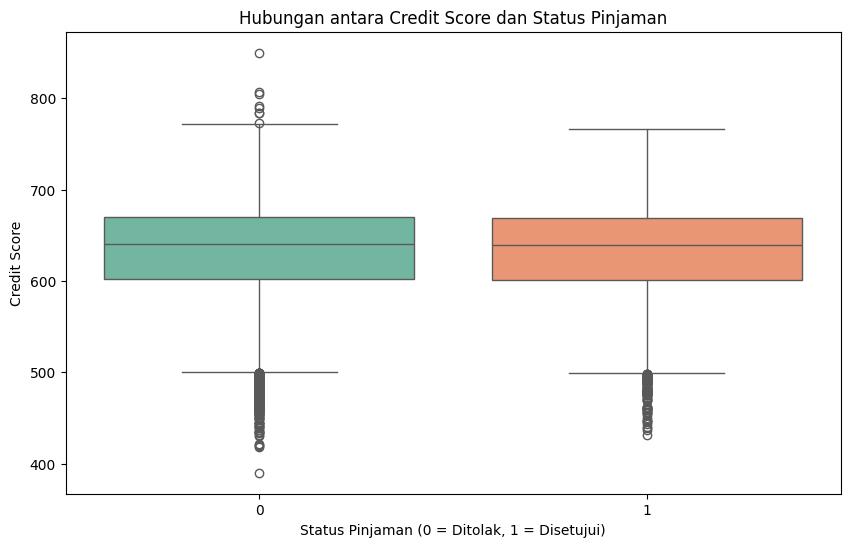

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='credit_score', data=df, palette="Set2")
plt.title("Hubungan antara Credit Score dan Status Pinjaman")
plt.xlabel("Status Pinjaman (0 = Ditolak, 1 = Disetujui)")
plt.ylabel("Credit Score")
plt.show()

credit score berperan penting dalam keputusan persetujuan pinjaman, di mana skor yang lebih tinggi meningkatkan peluang persetujuan

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_2248/972869790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette="Set1")


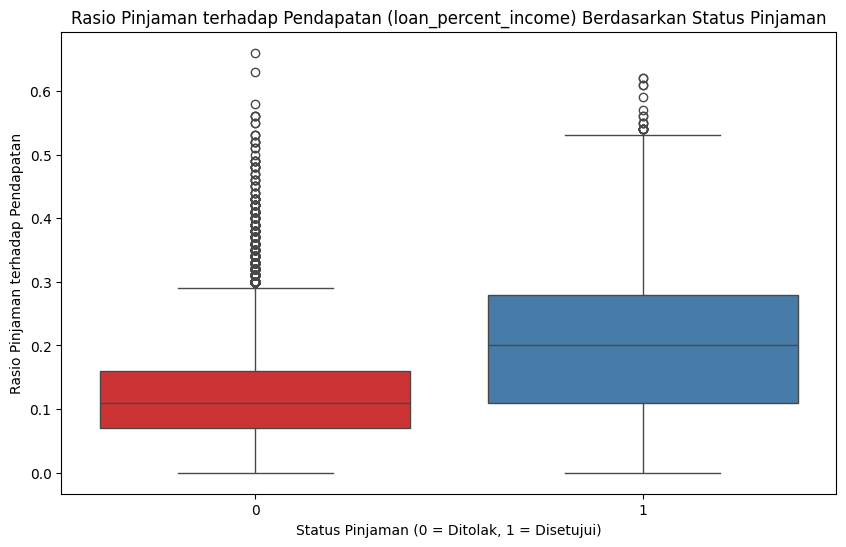

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, palette="Set1")
plt.title("Rasio Pinjaman terhadap Pendapatan (loan_percent_income) Berdasarkan Status Pinjaman")
plt.xlabel("Status Pinjaman (0 = Ditolak, 1 = Disetujui)")
plt.ylabel("Rasio Pinjaman terhadap Pendapatan")
plt.show()

Perusahaan Multifinance pemberi pinjaman lebih cenderung menyetujui pinjaman yang tidak membebani pendapatan peminjam secara signifikan

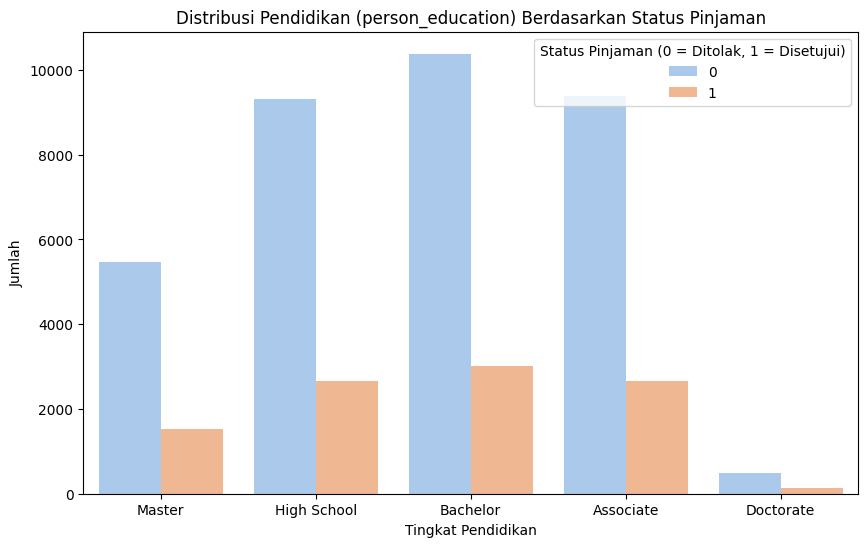

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='person_education', hue='loan_status', data=df, palette="pastel")
plt.title("Distribusi Pendidikan (person_education) Berdasarkan Status Pinjaman")
plt.xlabel("Tingkat Pendidikan")
plt.ylabel("Jumlah")
plt.legend(title="Status Pinjaman (0 = Ditolak, 1 = Disetujui)")
plt.show()

peminjam dengan pendidikan yang lebih tinggi mungkin dianggap memiliki profil risiko yang lebih rendah, sehingga peluang persetujuan pinjaman mereka lebih tinggi.

### Data Preprocess

#### Ordinal Encoding

In [11]:
#ordinal encoding untuk education
#ordinal encoding digunakan untuk data yg punya urutan / tingkatan
education_mapping = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}
df['person_education'] = df['person_education'].map(education_mapping)

In [12]:
#check
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,4,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,1,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,1,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,3,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,4,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


#### One Hot Encoding

In [13]:
#ubah gender menjadi female = 0 ; male : 1
#male : 1 & female : 0
#gender_male : 0 => female
#gender_male : 1 => male
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})

# Verifying data types after conversion
df.dtypes


person_age                        float64
person_gender                       int64
person_education                    int64
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [14]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [15]:
#one-hot encoding person_home_ownership

#lakukan untuk person_home_ownership
df = pd.get_dummies(df, columns=['person_home_ownership'], drop_first=True)

In [16]:
home_ownership_columns = ['person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT']
df[home_ownership_columns] = df[home_ownership_columns].astype(int)

In [17]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [18]:
df = pd.get_dummies(df, columns=['loan_intent'], drop_first=True)

In [19]:
#one-hot encoding loan_intent
loan_intent_columns = ['loan_intent_EDUCATION', 'loan_intent_PERSONAL', 'loan_intent_MEDICAL', 'loan_intent_VENTURE', 'loan_intent_HOMEIMPROVEMENT']
df[loan_intent_columns] = df[loan_intent_columns].astype(int)

In [20]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
#ubah previous loan defaults on file jadi 0 & 1
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

In [22]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,0,0,1,0,0,0,1,0
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,0,1,0,1,0,0,0,0
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,0,0,0,0,0,1,0,0
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,0,0,1,0,0,1,0,0
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,0,0,1,0,0,1,0,0


In [23]:
# Moving the 'loan_status' column to the end of the DataFrame
loan_data = df[[col for col in df.columns if col != 'loan_status'] + ['loan_status']]

# Displaying the first few rows to confirm the change
loan_data.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,0,0,1,0,0,0,1,0,1
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,1,0,1,0,0,0,0,0
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,0,0,0,0,0,1,0,0,1
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,0,0,1,0,0,1,0,0,1
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,0,0,1,0,0,1,0,0,1


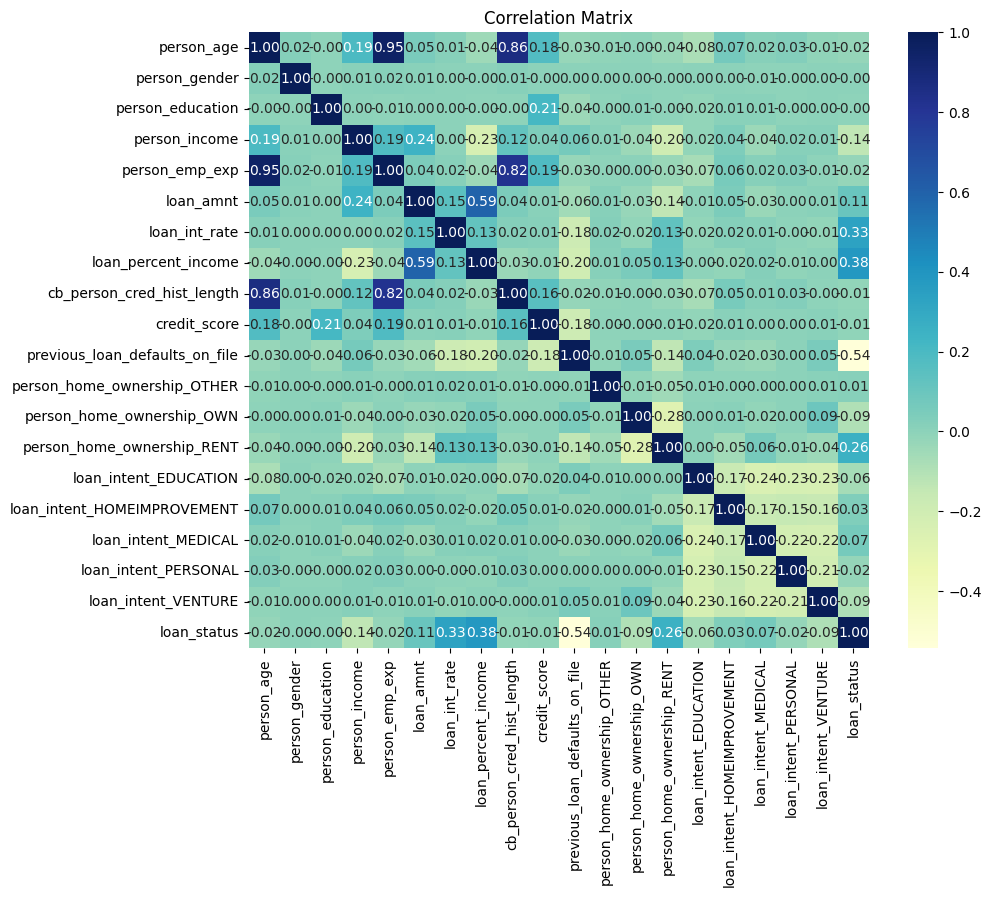

In [24]:
#correlation
plt.figure(figsize=(10, 8))
sns.heatmap(loan_data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Create ML Model

In [25]:
X = loan_data.drop('loan_status', axis=1)
y = loan_data['loan_status']

In [26]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,0,0,1,0,0,0,1,0
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,1,0,1,0,0,0,0
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,0,0,0,0,0,1,0,0
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,0,0,1,0,0,1,0,0
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,0,0,1,0,0,1,0,0


In [27]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
#model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [30]:
accuracy_randomForest = accuracy_score(y_test, y_pred)
report_randomForest = classification_report(y_test, y_pred)
print("Evaluasi Model dengan Random Forest")
print("Accuracy Score : " , accuracy_randomForest)
print(report_randomForest)

Evaluasi Model dengan Random Forest
Accuracy Score :  0.9305555555555556
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



#### misal dari 1000 pinjaman yg masuk , secara real 100 loan_status = 0 & 900 loan_status = 1 :

a. 100 pinjaman seharusnya di tolak (loan_status = 0) => model randomForest berhasil menebak sebanyak 96 orang, yg lolos 4

b. 900 pinjaman yg seharusnya di terima (loan_status = 1) => model randomForest berhasil menebak sebanyak 83% * 900 = 747 orang, 153 yg lolos

### Kesimpulan

dengan algoritma Random Forest
- 93% dari prediksi model terhadap data uji cocok dengan nilai asli (loan_status)
- Sisa 7% adalah prediksi yang salah (misalnya, model memprediksi status pinjaman disetujui padahal sebenarnya ditolak, atau sebaliknya)

In [31]:
#model logistic regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
y_pred_logistic = logistic_model.predict(X_test)

In [33]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print("Evaluasi Model dengan Logistic Regression")
print("Accuracy Score : ", accuracy_logistic)
print(report_logistic)

Evaluasi Model dengan Logistic Regression
Accuracy Score :  0.791
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6990
           1       0.68      0.12      0.21      2010

    accuracy                           0.79      9000
   macro avg       0.74      0.55      0.54      9000
weighted avg       0.77      0.79      0.73      9000



#### misal dari 1000 pinjaman yg masuk , secara real 100 loan_status = 0 & 900 loan_status = 1 :

a. 100 pinjaman seharusnya di tolak (loan_status = 0) => model logisticRegression berhasil menebak sebanyak 93 orang, yg lolos 7

b. 900 pinjaman yg seharusnya di terima (loan_status = 1) => model logisticRegression berhasil menebak sebanyak 74% * 900 = 666 orang, 234 yg lolos


### Final Result
model randomForest lebih baik dibanding logisticRegression untuk identifikasi loan mana yang di approve

In [34]:
#Inference Function
def single_inference(model, input_data):
    columns = X.columns
    input_df = pd.DataFrame([input_data], columns=columns)
    prediction = model.predict(input_df)[0]
    return prediction

In [35]:
example_data = {
    'person_age': 25,
    'person_gender': 1,  # 1 for male, 0 for female
    'person_education': 3,  # Bachelor
    'person_income': 50000,
    'person_emp_exp': 0,
    'loan_amnt': 15000,
    'loan_int_rate': 13.5,
    'loan_percent_income': 0.3,
    'cb_person_cred_hist_length': 4,
    'previous_loan_defaults_on_file' : 1,
    'credit_score': 700,
    'previous_loan_defaults_on_file_No': 1,
    'previous_loan_defaults_on_file_Yes': 0,
    'person_home_ownership_OTHER': 0,
    'person_home_ownership_OWN': 0,
    'person_home_ownership_RENT': 1,
    'loan_intent_DEBTCONSOLIDATION': 0,
    'loan_intent_EDUCATION': 0,
    'loan_intent_HOMEIMPROVEMENT': 0,
    'loan_intent_MEDICAL': 0,
    'loan_intent_PERSONAL': 1,  # Marking PERSONAL as 1
    'loan_intent_VENTURE': 0
}

In [36]:
prepared_example_data = pd.DataFrame([example_data], columns=X.columns)

In [37]:
prepared_example_data

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,25,1,3,50000,0,15000,13.5,0.3,4,700,1,0,0,1,0,0,0,1,0


In [38]:
prediction_result = single_inference(model, prepared_example_data.to_dict(orient='records')[0])
print("Hasil :", "Approved" if prediction_result == 1 else "Rejected")

Hasil : Rejected
